In [1]:
# Importing Dependencies
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as st

In [4]:
# Creating Filepath
filepath = '../Resources/cleanedCaseSurveillance.csv'

# Reading CSV File
df = pd.read_csv(filepath)

# Printing DataFrame
df.head()

,CDC Report Date,Covid Status,Gender,Age Group,Race/Ethnicity,Hospitalized,Pre-Existing Condition
0,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
1,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
2,2020/11/19,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
3,2020/11/13,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
4,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No


In [5]:
# Dropping Unnamed:0
df = df[['Covid Status', 'Gender', "Hospitalized"]]

df.head(10)

,Covid Status,Gender,Hospitalized
0,Laboratory-confirmed case,Male,No
1,Laboratory-confirmed case,Male,No
2,Laboratory-confirmed case,Male,No
3,Laboratory-confirmed case,Male,No
4,Laboratory-confirmed case,Male,No
5,Laboratory-confirmed case,Male,No
6,Laboratory-confirmed case,Male,No
7,Laboratory-confirmed case,Male,No
8,Laboratory-confirmed case,Male,No
9,Laboratory-confirmed case,Male,No


In [6]:
# Creating DataFrame of Hospitalized Males and Females
hosp_male_df = df.loc[(df['Gender'] == 'Male') & (df['Hospitalized'] == 'Yes')]
hosp_female_df = df.loc[(df['Gender'] == 'Female') & (df['Hospitalized'] == 'Yes')]

hosp_male_size = len(df.loc[(df['Gender'] == 'Male') & (df['Hospitalized'] == 'Yes')])
hosp_female_size = len(df.loc[(df['Gender'] == 'Female') & (df['Hospitalized'] == 'Yes')])

no_hosp_male_size = len(df.loc[(df['Gender'] == 'Male') & (df['Hospitalized'] == 'No')])
no_hosp_female_size = len(df.loc[(df['Gender'] == 'Female') & (df['Hospitalized'] == 'No')])

Text(0.5, 1.0, 'Labratory Confirmed Cases Across the USA')

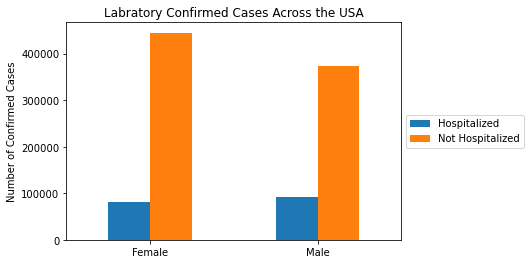

In [7]:
index = ['Female','Male']
confirmed_df = pd.DataFrame({'Hospitalized': [hosp_female_size, hosp_male_size], 'Not Hospitalized': [no_hosp_female_size, no_hosp_male_size]}, index=index)
confirmed_df.plot.bar(rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Number of Confirmed Cases')
plt.title('Labratory Confirmed Cases Across the USA')

Text(0.5, 1.0, 'Hospitalized Patients with COVID-19')

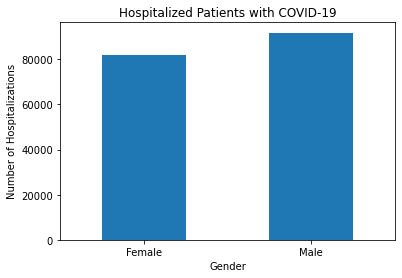

In [8]:
hosp_df = pd.DataFrame({'Gender': ['Female','Male'], 'Number Hospitalized': [hosp_female_size,hosp_male_size]})
hosp_df.plot.bar(x='Gender', y='Number Hospitalized', rot=0, legend=False)
plt.ylabel('Number of Hospitalizations')
plt.title('Hospitalized Patients with COVID-19')